In [1]:
import os
import numpy as np
import time
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba
from IPython.display import set_matplotlib_formats
import seaborn as sns
from tqdm.notebook import tqdm

%matplotlib inline 
set_matplotlib_formats('svg', 'pdf')  # For export

import torch
from boring_utils.utils import *

/tmp/ipykernel_12100/2001084439.py:11: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg', 'pdf')  # For export


# Assign Values to Tensor

To directly assign values to the tensor during initialization, there are many alternatives including:

* `torch.zeros`: Creates a tensor filled with zeros
* `torch.ones`: Creates a tensor filled with ones
* `torch.rand`: Creates a tensor with random values uniformly sampled between 0 and 1
* `torch.randn`: Creates a tensor with random values sampled from a normal distribution with mean 0 and variance 1
* `torch.arange`: Creates a tensor containing the values $N,N+1,N+2,...,M$
* `torch.Tensor` (input list): Creates a tensor from the list elements you provide
* `torch.from_numpy`: Converts a numpy array into a PyTorch tensor

In [2]:
x = torch.Tensor(2, 3, 4)
cprint(x)

<module> -> x:
tensor([[[ 4.2039e-45,  0.0000e+00,  3.9699e-42,  0.0000e+00],
         [-8.1979e+32,  4.0600e-41, -8.1979e+32,  4.0600e-41],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00]],

        [[ 1.5174e+23,  1.0507e+22,  1.4013e-45,  6.6893e-24],
         [-3.7694e-37,  2.7101e+36,  1.5405e+23,  2.8494e-14],
         [ 5.2776e-34,  7.7010e+31,  1.6962e+19,  2.8958e+32]]])


In [3]:
# x = torch.tensor([[1, 2], [3, 4]])
x = torch.randn([2, 3, 4])
cprint(x, x.shape, x.size())

<module> -> x:
tensor([[[-0.3604, -1.2835,  0.4901, -0.7682],
         [-0.8426,  1.2901,  0.7839, -1.3511],
         [-0.6219,  1.0967, -0.5926, -1.0381]],

        [[ 0.4822, -0.9502,  1.8986, -0.1346],
         [-1.3971, -1.3174, -0.1946, -0.9427],
         [ 0.3359,  0.7515,  1.8342, -1.0912]]])
<module> -> x.shape:
torch.Size([2, 3, 4])
<module> -> x.size():
torch.Size([2, 3, 4])


Calling `x1 + x2` creates a new tensor containing the sum of the two inputs. However, we can also use in-place operations that are applied directly on the memory of a tensor. We therefore change the values of `x2` without the chance to re-accessing the values of `x2` before the operation.

In [4]:
x1 = torch.rand(2, 3)
x2 = torch.rand(2, 3)

y = x1 + x2
x2.add_(x1)

tensor([[1.5443, 1.9060, 0.1949],
        [1.1247, 1.4334, 1.0039]])

In [5]:
# address of y:
cprint(id(y), id(x1), id(x2))
# cprint(y, x1, x2)
cprint(y == x2)

<module> -> id(y):
124442115931520
<module> -> id(x1):
124438209136096
<module> -> id(x2):
124438209135776
<module> -> y == x2:
tensor([[True, True, True],
        [True, True, True]])


# Reshape

In [6]:
# original shape
x = torch.arange(0, 6)
cprint(x.shape)

x = x.view(2, 3)
cprint(x.shape)

# swap dim 0 and 1
x = x.permute(1, 0)
cprint(x.shape)

<module> -> x.shape:
torch.Size([6])
<module> -> x.shape:
torch.Size([2, 3])
<module> -> x.shape:
torch.Size([3, 2])


# Matrix Multiplications
Quite often, we have an input vector $\mathbf{x}$, which is transformed using a learned weight matrix $\mathbf{W}$. There are multiple ways and functions to perform matrix multiplication, some of which we list below:

* `torch.matmul`: Performs the matrix product over two tensors, where the specific behavior depends on the dimensions. If both inputs are matrices (2-dimensional tensors), it performs the standard matrix product. For higher dimensional inputs, the function supports broadcasting (for details see the [documentation](https://pytorch.org/docs/stable/generated/torch.matmul.html?highlight=matmul#torch.matmul)). Can also be written as `a @ b`, similar to numpy. 
* `torch.mm`: Performs the matrix product over two matrices, but doesn't support broadcasting (see [documentation](https://pytorch.org/docs/stable/generated/torch.mm.html?highlight=torch%20mm#torch.mm))
* `torch.bmm`: Performs the matrix product with a support batch dimension. If the first tensor $T$ is of shape ($b\times n\times m$), and the second tensor $R$ ($b\times m\times p$), the output $O$ is of shape ($b\times n\times p$), and has been calculated by performing $b$ matrix multiplications of the submatrices of $T$ and $R$: $O_i = T_i @ R_i$
* `torch.einsum`: Performs matrix multiplications and more (i.e. sums of products) using the Einstein summation convention. Explanation of the Einstein sum can be found in assignment 1.

Usually, we use `torch.matmul` or `torch.bmm`. We can try a matrix multiplication with `torch.matmul` below.

In [7]:
x = torch.arange(6)
x = x.view(2, 3)

W = torch.arange(12).view(3, 4)

h = x @ W
cprint(h.shape)

<module> -> h.shape:
torch.Size([2, 4])


# Indexing

In [8]:
x = torch.arange(12).view(3, 4)
cprint(x)

<module> -> x:
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


In [9]:
# 2nd col
cprint(x[:, 1])

# 1st row
cprint(x[0])

# elements of the tensor x that are both in first two rows and the last column 
cprint(x[:2, -1])

# 2nd half of the tensor x 
cprint(x[len(x[0])//2:, :])

<module> -> x[:, 1]:
tensor([1, 5, 9])
<module> -> x[0]:
tensor([0, 1, 2, 3])
<module> -> x[:2, -1]:
tensor([3, 7])
<module> -> x[len(x[0])//2:, :]:
tensor([[ 8,  9, 10, 11]])


# Dynamic Graph

In [10]:
x = torch.ones((3,))
cprint(x)

<module> -> x:
tensor([1., 1., 1.])


In [11]:
x.requires_grad_(True)
cprint(x.requires_grad)

<module> -> x.requires_grad:
True


In order to get familiar with the concept of a computation graph, we will create one for the following function:

$$y = \frac{1}{|x|}\sum_i \left[(x_i + 2)^2 + 3\right]$$

You could imagine that $x$ are our parameters, and we want to optimize (either maximize or minimize) the output $y$. For this, we want to obtain the gradients $\partial y / \partial \mathbf{x}$. For our example, we'll use $\mathbf{x}=[0,1,2]$ as our input.

In [12]:
# NOTE: only float tensors can require gradients!!!
x = torch.arange(3, dtype=torch.float32, requires_grad=True)
cprint(x)

# Ops: (add -> a, square -> b, add -> c, mean -> y)
a = x + 2
b = a ** 2
c = b + 3
y = c.mean()

cprint(y)

<module> -> x:
tensor([0., 1., 2.], requires_grad=True)
<module> -> y:
tensor(12.6667, grad_fn=<MeanBackward0>)


In [13]:
cprint(x.grad)

y.backward()

cprint(x.grad)

<module> -> x.grad:
None
<module> -> x.grad:
tensor([1.3333, 2.0000, 2.6667])


# GPU

In [14]:
cprint(torch.cuda.is_available())
device = 'cuda' if torch.cuda.is_available() else 'cpu'

<module> -> torch.cuda.is_available():
True


In [15]:
x = x.to(device)
cprint(x)

<module> -> x:
tensor([0., 1., 2.], device='cuda:0', grad_fn=<ToCopyBackward0>)


In [16]:
# GPU operations have a separate seed we also want to set
if torch.cuda.is_available(): 
    torch.cuda.manual_seed(42)
    torch.cuda.manual_seed_all(42)
    
# Additionally, some operations on a GPU are implemented stochastic for efficiency
# We want to ensure that all operations are deterministic on GPU (if used) for reproducibility
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# Demo XOR

In [17]:
from torch import nn
import torch.nn.functional as F

from torch.utils.data import Dataset, DataLoader

## NN

In [33]:
class SimpleClassifier(nn.Module):
    def __init__(self, in_dim, hidden_dim, out_dim):
        super().__init__()
        
        self.ln1 = nn.Linear(in_dim, hidden_dim)
        self.ln2 = nn.Linear(hidden_dim, out_dim)

        # self.ac = nn.ReLU()
        self.ac = nn.Tanh()

    def forward(self, x):
        x = self.ln1(x)
        x = self.ac(x)
        x = self.ln2(x)

        return x


# XOR
# model = SimpleClassifier(2, 4, 1)
model = SimpleClassifier(2, 4, 2)
cprint(model)

<module> -> model:
SimpleClassifier(
  (ln1): Linear(in_features=2, out_features=4, bias=True)
  (ln2): Linear(in_features=4, out_features=2, bias=True)
  (ac): Tanh()
)


In [34]:
for name, param in model.named_parameters():
    print("Parameter %s, shape %s" % (name, str(param.shape)))

Parameter ln1.weight, shape torch.Size([4, 2])
Parameter ln1.bias, shape torch.Size([4])
Parameter ln2.weight, shape torch.Size([2, 4])
Parameter ln2.bias, shape torch.Size([2])


## Data

In [35]:
temp_data = torch.randint(0, 2, (10, 2)).float()
temp_label = (temp_data.sum(dim=1) == 1).float().view(-1, 1)
cprint(temp_data.shape, temp_data.sum(dim=1))
# cprint(temp_label)

<module> -> temp_data.shape:
torch.Size([10, 2])
<module> -> temp_data.sum(dim=1):
tensor([0., 1., 1., 0., 0., 0., 0., 2., 0., 1.])


In [36]:
class XORDataset(Dataset):
    def __init__(self, size, std = 0.1):
        self.size = size
        self.std = std
        self.generate_continuous_xor()
    
    def generate_continuous_xor(self):
        '''
        Each data point in the XOR dataset has two variables, x and y, that can be either 0 or 1
        The label is their XOR combination
        '''

        # self.size, 2 => size of (x, y)
        data = torch.randint(0, 2, (self.size, 2)).float()
        self.label = (data.sum(dim=1) == 1).float()

        # add noise
        self.data = data + self.std * torch.randn(data.shape)

    def __len__(self):
        return self.size
    
    def __getitem__(self, idx):
        return self.data[idx], self.label[idx]


dataset = XORDataset(size=200)
cprint(len(dataset))
cprint(dataset[0])

<module> -> len(dataset):
200
<module> -> dataset[0]:
(tensor([-0.0519,  0.9924]), tensor(1.))


In [37]:
mprint(dataset, magic_methods=False, private_methods=False)


Public Methods:
    data
    generate_continuous_xor
    label
    size
    std


In [38]:
cprint(dataset.data.shape, dataset.label.shape)

<module> -> dataset.data.shape:
torch.Size([200, 2])
<module> -> dataset.label.shape:
torch.Size([200])


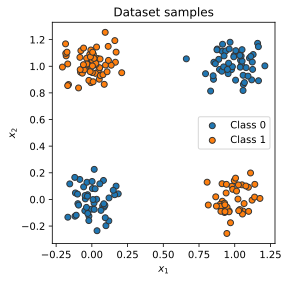

In [39]:
def vis_samples(data, label):
    if isinstance(data, torch.Tensor):
        data = data.cpu().numpy()
    if isinstance(label, torch.Tensor):
        label = label.cpu().numpy().flatten()
    data_0 = data[label == 0]
    data_1 = data[label == 1]
    
    plt.figure(figsize=(4,4))
    plt.scatter(data_0[:,0], data_0[:,1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:,0], data_1[:,1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()


vis_samples(dataset.data, dataset.label)
plt.show()

# Dataloader

In [40]:
data_loader = DataLoader(dataset, batch_size=8, shuffle=True)

In [41]:
data_inputs, data_labels = next(iter(data_loader))

cprint(data_inputs, data_labels)

<module> -> data_inputs:
tensor([[ 0.8934,  0.9759],
        [-0.0519,  0.9924],
        [-0.0028, -0.0734],
        [ 0.9095,  0.9627],
        [ 1.0074,  1.1173],
        [-0.0348,  1.0172],
        [-0.0454,  0.0038],
        [ 1.0110,  1.0996]])
<module> -> data_labels:
tensor([0., 1., 0., 0., 0., 1., 0., 0.])


# Optm and loss

In [42]:
# loss_module = nn.BCEWithLogitsLoss()
loss_module = nn.CrossEntropyLoss()

# Input to the optimizer are the parameters of the model: model.parameters()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# Training

In [43]:
train_dataset = XORDataset(size=2500)
train_data_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

model.to(device)

SimpleClassifier(
  (ln1): Linear(in_features=2, out_features=4, bias=True)
  (ln2): Linear(in_features=4, out_features=2, bias=True)
  (ac): Tanh()
)

In [45]:
def train(model, data_loader, optimizer, loss_module, epochs=100):
    model.train()
    for epoch in tqdm(range(epochs)):
        for data, label in data_loader:
            # Move input data to device
            data, label = data.to(device), label.to(device).long()

            preds = model(data)
            # Output is [Batch size, 1], but we want [Batch size]
            preds = preds.squeeze(dim=1)
            loss = loss_module(preds, label)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()


train(model, train_data_loader, optimizer, loss_module)

  0%|          | 0/100 [00:00<?, ?it/s]

In [46]:
model.state_dict()

OrderedDict([('ln1.weight',
              tensor([[ 2.9011, -2.8424],
                      [ 0.1182, -0.0968],
                      [-2.9552,  3.0566],
                      [-0.1018, -0.2453]], device='cuda:0')),
             ('ln1.bias',
              tensor([ 1.3817, -1.1023,  1.4586, -1.0938], device='cuda:0')),
             ('ln2.weight',
              tensor([[ 3.1580,  0.7388,  2.9443,  0.9220],
                      [-2.7387, -0.8419, -3.0314, -0.7839]], device='cuda:0')),
             ('ln2.bias', tensor([-1.0118,  1.7613], device='cuda:0'))])

# Eval

In [47]:
test_dataset = XORDataset(size=500)

# NOTE: in test, don't drop last!!!
test_data_loader = DataLoader(test_dataset, batch_size=128, shuffle=False, drop_last=False) 

In [48]:
def eval_model(model, data_loader):
    model.eval()
    true_preds, num_preds = 0., 0.

    with torch.no_grad():
        for data, label in data_loader:
            data, label = data.to(device), label.to(device)
            preds = model(data)
            # torch.Size([128, 1])
            # cprint(output.shape, label.shape)
            preds = preds.squeeze(dim=1)

            preds = preds.argmax(dim=1)  # for CE
            # preds = torch.sigmoid(preds)  # for BCEWithLogits
            preds = (preds > 0.5).float()
            # loss = loss_module(output, label)

            true_preds += (preds == label).sum()
            num_preds += label.shape[0]

    acc = true_preds / num_preds
    print(f"Accuracy of the model: {100.0*acc:4.2f}%")


eval_model(model, test_data_loader)

Accuracy of the model: 100.00%


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


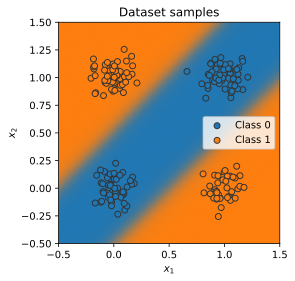

In [56]:
@torch.no_grad()  # Decorator, same effect as "with torch.no_grad(): ..." over the whole function.
def visualize_classification(model, data, label):
    if isinstance(data, torch.Tensor):
        data = data.cpu().numpy()
    if isinstance(label, torch.Tensor):
        label = label.cpu().numpy().flatten()
    data_0 = data[label == 0]
    data_1 = data[label == 1]
    
    fig = plt.figure(figsize=(4,4), dpi=500)
    plt.scatter(data_0[:,0], data_0[:,1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:,0], data_1[:,1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()
    
    # Let's make use of a lot of operations we have learned above
    model.to(device)
    x1 = torch.arange(-0.5, 1.5, step=0.01, device=device)
    x2 = torch.arange(-0.5, 1.5, step=0.01, device=device)
    xx1, xx2 = torch.meshgrid(x1, x2, indexing='ij')  # Meshgrid function as in numpy

    model_inputs = torch.stack([xx1, xx2], dim=-1)
    c0 = torch.Tensor(to_rgba("C0")).to(device)
    c1 = torch.Tensor(to_rgba("C1")).to(device)
    preds = model(model_inputs)

    # for CE
    preds_proba = torch.softmax(preds, dim=-1)
    # output_image = torch.zeros((*preds_proba.shape[:2], 3), device=preds_proba.device)
    # output_image[:,:,0] = preds_proba[:,:,0] 
    # output_image[:,:,1] = preds_proba[:,:,1]
    output_image = preds_proba[:,:,0,None] * c0 + preds_proba[:,:,1,None] * c1

    # for BCEWithLogits
    # preds = torch.sigmoid(preds)
    # output_image = (1 - preds) * c0[None,None] + preds * c1[None,None]  # Specifying "None" in a dimension creates a new one

    output_image = output_image.cpu().numpy()  # Convert to numpy array. This only works for tensors on CPU, hence first push to CPU
    plt.imshow(output_image, origin='lower', extent=(-0.5, 1.5, -0.5, 1.5))
    plt.grid(False)
    return fig

_ = visualize_classification(model, dataset.data, dataset.label)
plt.show()